In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1', usecols=[0,1])

In [3]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   v1      5572 non-null   object
 1   v2      5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
df.rename(columns={'v1':'Category', 'v2':'Email'}, inplace=True)

In [6]:
df.duplicated().sum()

403

In [7]:
df = df.drop_duplicates(keep= 'first')

In [8]:
df.head()

,Category,Email
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df['Category'].value_counts()

Category
ham     4516
spam     653
Name: count, dtype: int64

In [10]:
# HAM PERCENTAGE
(df['Category'].value_counts()['ham'] / ((df['Category'].value_counts()['spam'])+(df['Category'].value_counts()['ham'])))*100

87.3669955503966

In [11]:
# SPAM PERCENTAGE
(df['Category'].value_counts()['spam'] / ((df['Category'].value_counts()['spam'])+(df['Category'].value_counts()['ham'])))*100

12.633004449603405

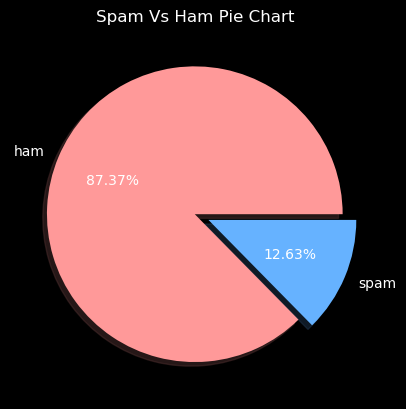

In [12]:
custom_colors = ['#FF9999', '#66B2FF']
plt.style.use('dark_background')
category_counts = df['Category'].value_counts()
plt.pie(x=category_counts, labels=category_counts.index, autopct='%1.2f%%', colors=custom_colors, shadow=True, explode=(0,0.1))
plt.title('Spam Vs Ham Pie Chart')
plt.show()

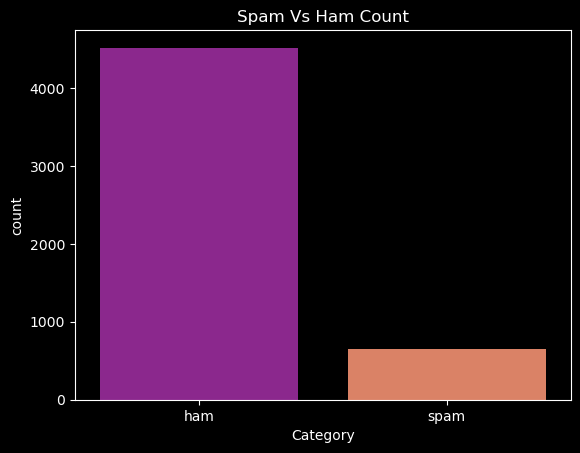

In [13]:
sns.countplot(data=df, x='Category', palette='plasma')
plt.title('Spam Vs Ham Count')
plt.show()

In [14]:
df.describe()

,Category,Email
count,5169,5169
unique,2,5169
top,ham,"Go until jurong point, crazy.. Available only ..."
freq,4516,1


In [15]:
df.groupby('Category').describe()

Email                                                               
         count unique                                                top freq
Category                                                                     
ham       4516   4516  Go until jurong point, crazy.. Available only ...    1
spam       653    653  Free entry in 2 a wkly comp to win FA Cup fina...    1

In [16]:
df['Length'] = df['Email'].apply(len)

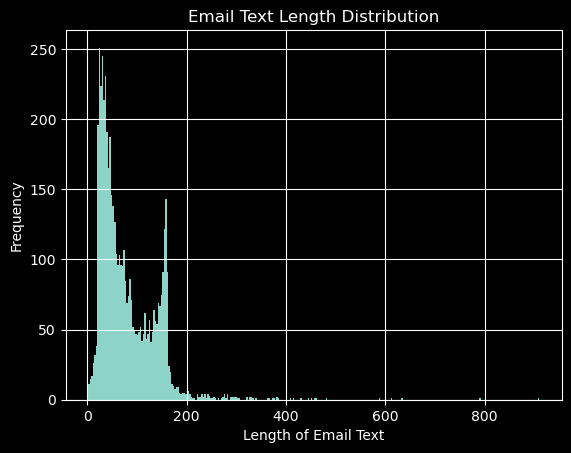

In [17]:
df['Length'].plot.hist(bins=300)
plt.grid()
plt.title('Email Text Length Distribution')
plt.xlabel('Length of Email Text')
plt.show()

In [18]:
# Above is a Bimodal Distribution

In [19]:
df['Length'].describe()

count    5169.000000
mean       78.977945
std        58.236293
min         2.000000
25%        36.000000
50%        60.000000
75%       117.000000
max       910.000000
Name: Length, dtype: float64

In [20]:
df[df['Length']==910]['Email'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

In [21]:
# this above email seems like a ham

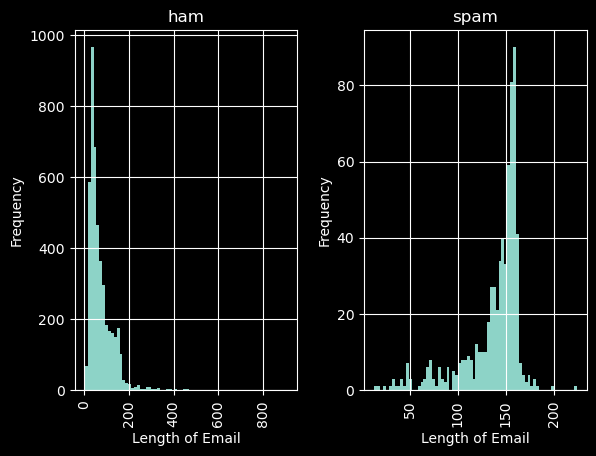

In [22]:
fig ,ax =plt.subplots(1,2)
df.hist(column='Length', by='Category', ax=ax, bins=70)
for x in ax:
    x.grid()
    x.set_xlabel('Length of Email')
    x.set_ylabel('Frequency')
plt.show()

In [23]:
from wordcloud import WordCloud

In [24]:
wc =WordCloud()

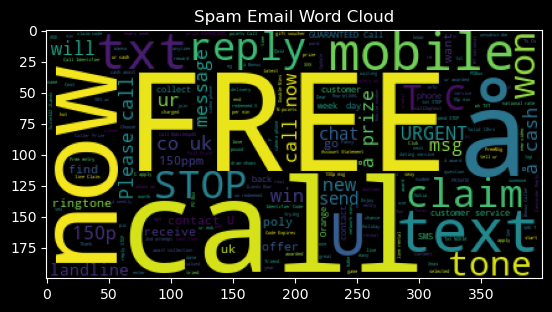

In [25]:
spam_wc = wc.generate(df[df['Category']=='spam']['Email'].str.cat(sep = " "))
plt.title('Spam Email Word Cloud')
plt.imshow(spam_wc)
plt.show()

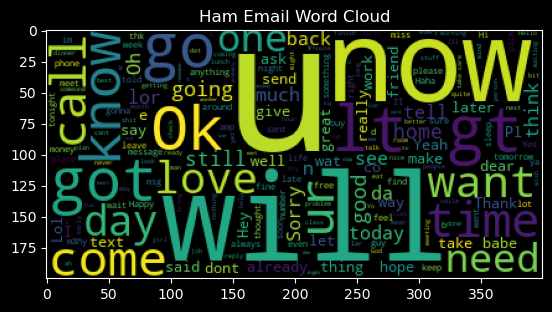

In [26]:
ham_wc = wc.generate(df[df['Category']=='ham']['Email'].str.cat(sep = " "))
plt.title('Ham Email Word Cloud')
plt.imshow(ham_wc)
plt.show()

In [27]:
spam_list = []
for x in df[df['Category']=='spam']['Email'].tolist():
    for word in x.split():
        spam_list.append(word)

In [28]:
from collections import Counter

In [29]:
spam_top30 = pd.DataFrame(Counter(spam_list).most_common(30))

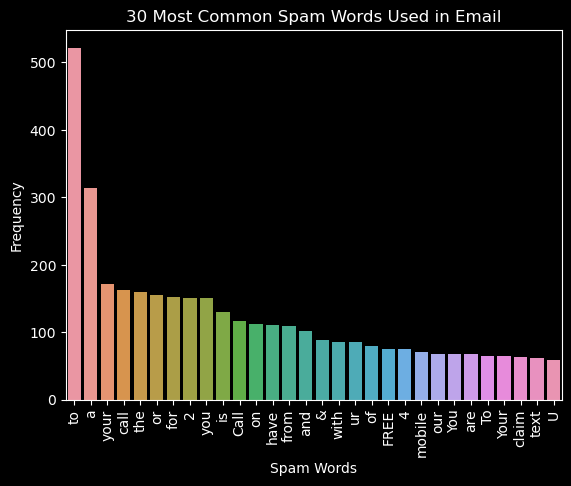

In [30]:
sns.barplot(data=spam_top30, x=spam_top30[0], y=spam_top30[1])
plt.xticks(rotation=90)
plt.xlabel('Spam Words')
plt.ylabel('Frequency')
plt.title('30 Most Common Spam Words Used in Email')
plt.show()

In [31]:
ham_list=[]
for i in df[df['Category']=='ham']['Email']:
    for wrd in i.split():
        ham_list.append(wrd)

In [32]:
ham_top30 = pd.DataFrame(Counter(ham_list).most_common(30))

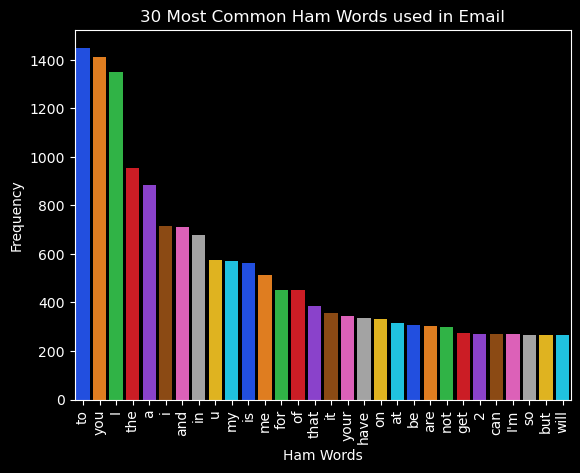

In [33]:
sns.barplot(data=ham_top30, x=ham_top30[0], y=ham_top30[1], palette='bright')
plt.xticks(rotation=90)
plt.xlabel('Ham Words')
plt.ylabel('Frequency')
plt.title('30 Most Common Ham Words used in Email')
plt.show()

In [34]:
import string
from nltk.corpus import stopwords

In [35]:
def email_text_preprocess(text):
    nopunc = [i for i in text if i not in string.punctuation]
    nopunc = ''.join(nopunc)
    final = [word.lower() for word in nopunc.split() if word.lower() not in stopwords.words('english')]
    return ' '.join(final)

In [36]:
df['cleaned_email'] = df['Email'].apply(email_text_preprocess)

In [37]:
df.head()

,Category,Email,Length,cleaned_email
0,ham,"Go until jurong point, crazy.. Available only ...",111,go jurong point crazy available bugis n great ...
1,ham,Ok lar... Joking wif u oni...,29,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155,free entry 2 wkly comp win fa cup final tkts 2...
3,ham,U dun say so early hor... U c already then say...,49,u dun say early hor u c already say
4,ham,"Nah I don't think he goes to usf, he lives aro...",61,nah dont think goes usf lives around though


In [38]:
x = df['cleaned_email'].values
y = df['Category'].values

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

In [40]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=69)

In [41]:
tfidf = TfidfVectorizer()

In [42]:
x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

In [43]:
from sklearn.naive_bayes import MultinomialNB

In [44]:
mnb = MultinomialNB()

In [45]:
mnb.fit(x_train, y_train)

MultinomialNB()

In [46]:
prediction = mnb.predict(x_test)

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

         ham       0.96      1.00      0.98       906
        spam       1.00      0.68      0.81       128

    accuracy                           0.96      1034
   macro avg       0.98      0.84      0.89      1034
weighted avg       0.96      0.96      0.96      1034



In [49]:
print(confusion_matrix(y_test, prediction))

[[906   0]
 [ 41  87]]
